# Python_ML_DL Midterm Project


## 題目: 從頭實作 Linear regression 和 logistic regression

### 動機、程式說明
Andrew =>octave ，轉成python

[資料來源](https://archive.ics.uci.edu/ml/datasets/Abalone)

### 功能

- Linear regression

- logistic regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


%run ./LinearRegression.ipynb #include這個file進來

In [2]:
def Replace(x):#把性別換成數字
    if x.values=='M':
        return 1
    elif x.values == 'F':
        return 2
    elif x.values == 'I':
        return 3

dataset = pd.read_csv('./abalone.data',header=None)
colnames = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
dataset.columns = colnames 
#dataset.isnull().any() 檢查過沒有null了
#dataset.shape =>(4177, 9)
#把X 和 Y分離開( feature 和 result)
Y= dataset.loc[:,['Rings']] 
X= dataset.drop(['Rings'],axis=1)
X.loc[:,['Sex']] = X.loc[:,['Sex']].apply(Replace, axis=1)#把性別換成數字
X['X0']=1 #我們通常會自己加入一行X0= 1，因為為了配合θ0*X0 + θ1*X1 + θ2*X2 中的θ0 ，θ0*1剛好就是θ0，因此要保持θ0是常數項就要讓X0=1。

print(X.columns)
X.head()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'X0'],
      dtype='object')


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,X0
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [3]:
AddpolynomialFeature(X,6)#代表要加入1~6次方的所有feature，例如 Sex，就會有新column Sex2 Sex3...Sex6 表示1~6次方
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size = 0.2, random_state = 4) #用80%做training set

print(X.columns)
X.head()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'X0', 'Sex2', 'Length2', 'Diameter2',
       'Height2', 'Whole weight2', 'Shucked weight2', 'Viscera weight2',
       'Shell weight2', 'Sex3', 'Length3', 'Diameter3', 'Height3',
       'Whole weight3', 'Shucked weight3', 'Viscera weight3', 'Shell weight3',
       'Sex4', 'Length4', 'Diameter4', 'Height4', 'Whole weight4',
       'Shucked weight4', 'Viscera weight4', 'Shell weight4', 'Sex5',
       'Length5', 'Diameter5', 'Height5', 'Whole weight5', 'Shucked weight5',
       'Viscera weight5', 'Shell weight5', 'Sex6', 'Length6', 'Diameter6',
       'Height6', 'Whole weight6', 'Shucked weight6', 'Viscera weight6',
       'Shell weight6'],
      dtype='object')


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,X0,Sex2,...,Viscera weight5,Shell weight5,Sex6,Length6,Diameter6,Height6,Whole weight6,Shucked weight6,Viscera weight6,Shell weight6
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,1,...,1.051010e-05,7.593750e-05,1,0.008873,0.002365,7.350919e-07,0.018441,1.280260e-04,1.061520e-06,1.139062e-05
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,1,...,2.683544e-07,1.680700e-06,1,0.001838,0.000346,5.314410e-07,0.000131,9.703725e-07,1.301519e-08,1.176490e-07
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,4,...,5.672601e-05,4.084101e-04,64,0.022164,0.005489,6.053445e-06,0.096279,2.847897e-04,8.026730e-06,8.576612e-05
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,1,...,1.925415e-05,8.946610e-05,1,0.007256,0.002365,3.814697e-06,0.018875,1.001575e-04,2.194973e-06,1.386725e-05
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,9,...,9.615801e-08,5.032844e-07,729,0.001291,0.000275,2.621440e-07,0.000074,5.139705e-07,3.798241e-09,2.768064e-08


In [4]:
LinearR_CallFunc(x_train,x_test,y_train,y_test)

Call Library得到的R^2分數: 0.535627164320613


### 以下開始實作自己的linear regression

In [5]:
%run ./LinearRegression.ipynb
θ = np.zeros((x_train.shape[1],1))# θ要和X的feature 一樣多，因為是θ0*X0+θ1*X1......由這個式子找出最佳的 θ 組合
cost = CostFunction(θ,x_train.values,y_train.values)
cost

54.986830290332236

29.21095340169312

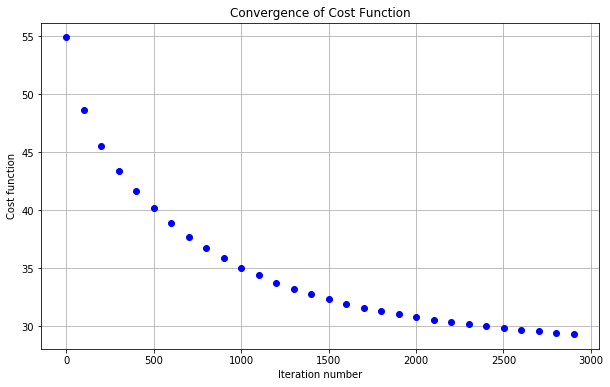

In [6]:
%run ./LinearRegression.ipynb
θ = np.zeros((x_train.shape[1],1))# θ要和X的feature 一樣多，因為是θ0*X0+θ1*X1......由這個式子找出最佳的 θ 組合
cost = CostFunction(θ,x_train.values,y_train.values)
cost
###########
iterations = 3000
θ ,J= GradientDescent(x_train.values,y_train.values,θ,0.0000103,iterations)

#Actually run gradient descent to get the best-fit theta values

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    for iter in range(1,iterations,100):
        plt.plot(iter,jvec[iter][0],'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")


plotConvergence(J)

#print(θ)
J[iterations-1][0]

In [7]:
from sklearn.metrics import r2_score
predict = x_test.values @ θ
r2_score(y_test.values,predict)

-4.877755932578984

問題:跌代太多次 overflow和underflow
alpha太高 太低 和(檢測方法)=>


0.5197200526969354

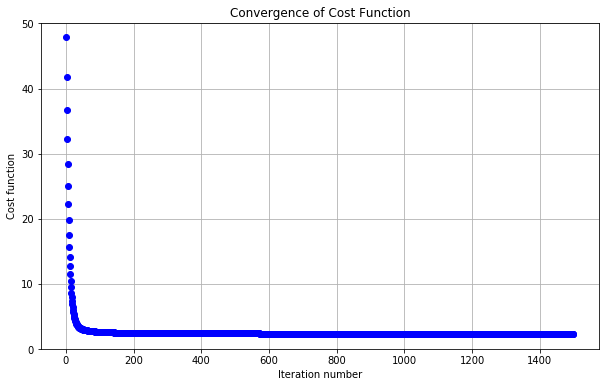

In [8]:
def plotConvergence2(jvec):
    plt.figure(figsize=(10,6))
    for iter in range(1,iterations,1):
        plt.plot(iter,jvec[iter][0],'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")


stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
Xnorm.shape[1]

for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm.iloc[:,icol]))
    stored_feature_stds.append(np.std(Xnorm.iloc[:,icol]))
    #Skip the first column
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm.iloc[:,icol] = (Xnorm.iloc[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

Xnorm.loc[:,'X0']=1


xnorm_train,xnorm_test,ynorm_train,ynorm_test =train_test_split(Xnorm,Y,test_size = 0.2, random_state = 4) #用80%做training set

θ = np.zeros((Xnorm.shape[1],1))# θ要和X的feature 一樣多，因為是θ0*X0+θ1*X1......由這個式子找出最佳的 θ 組合
###########
iterations = 1500
θ ,J= GradientDescent(xnorm_train.values,ynorm_train.values,θ,0.07,iterations)
plotConvergence2(J)
predict2 = xnorm_test.values @ θ
r2_score(y_test.values,predict2)

### logistic regression

In [ ]:
%run ./LogisticRegression.ipynb #include這個file進來
from scipy import optimize
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(CostFunction_Logi, x0=mytheta, args=(myX, myy), maxiter=3000, full_output=True)
    return result[0], result[1]


X_logi= X.copy()
Y_logi= Y.copy()
Y_logi.loc[:,'Rings']= Y_logi.loc[:,'Rings'].apply(classification)#將年齡分成4種 分別為 1 2 3 4

θ_1 = np.zeros((X_logi.shape[1],1))
θ_2 = np.zeros((X_logi.shape[1],1))
θ_3 = np.zeros((X_logi.shape[1],1))
θ_4 = np.zeros((X_logi.shape[1],1))

Y_1= Y_logi.loc[:,'Rings'].apply(Now_classify,who = 1).to_frame()
Y_2= Y_logi.loc[:,'Rings'].apply(Now_classify,who = 2).to_frame()
Y_3= Y_logi.loc[:,'Rings'].apply(Now_classify,who = 3).to_frame()
Y_4= Y_logi.loc[:,'Rings'].apply(Now_classify,who = 4).to_frame()

### TODO:  Y_1 Y_2 Y_3 Y_4都需要做一次(因為classification) 最後需要把所有的放進predict中去看max 是那個index，那個index就是最後結果
X_logi_train1,X_logi_test1,Y_logi_train1,Y_logi_test1 = \
train_test_split(X_logi,Y_1,test_size = 0.2, random_state = 2) #用80%做training set

X_logi_train2,X_logi_test2,Y_logi_train2,Y_logi_test2 = \
train_test_split(X_logi,Y_2,test_size = 0.2, random_state = 2) #用80%做training set

X_logi_train3,X_logi_test3,Y_logi_train3,Y_logi_test3 = \
train_test_split(X_logi,Y_3,test_size = 0.2, random_state = 2) #用80%做training set

X_logi_train4,X_logi_test4,Y_logi_train4,Y_logi_test4 = \
train_test_split(X_logi,Y_4,test_size = 0.2, random_state = 2) #用80%做training set



#print(Y_logi_test)
#CostFunction_Logi(θ,X_logi.values,Y_logi.values)
theta1, mincost1 = optimizeTheta(θ_1,X_logi_train1.values,Y_logi_train1.values)
theta2, mincost2 = optimizeTheta(θ_2,X_logi_train2.values,Y_logi_train2.values)
theta3, mincost3 = optimizeTheta(θ_3,X_logi_train3.values,Y_logi_train3.values)
theta4, mincost4 = optimizeTheta(θ_4,X_logi_train4.values,Y_logi_train4.values)


In [ ]:
predict1 = Sigmoid(X_logi_test @ theta1)
predict2 = Sigmoid(X_logi_test @ theta2)
predict3 = Sigmoid(X_logi_test @ theta3)
predict4 = Sigmoid(X_logi_test @ theta4)

'''
Test = predict.copy()
Test = pd.concat([Y_1,Y_2,Y_3,Y_4], axis=1)
#Result.append(predict)
'''
#predict.index
Result = pd.concat([predict1,predict2,predict3,predict4], axis=1)
Result

Result.idxmax(axis = 1)+1

count = 0
right = 0
for i in Result.index :
    #print(Result.loc[i,:].idxmax(axis = 1)+1)
    #print(Y_logi.loc[i,'Rings'])
    #算正確的有幾個
    if((Result.loc[i,:].idxmax(axis = 1)+1)==(Y_logi.loc[i,'Rings'])):
        right=right+1



print(f"{Y_logi_test1.size} 個 testing data 中有 {Y_logi_test1.size-right} 個 data 預測失誤 正確率{100 *right/Y_logi_test1.size} %")

### TODO

1. linear regression 可以加入 regularization 、 可以用Noraml equation

2. Logistic regression 處理完a. predict 裡面應該要有4行 從其中找出max 並存index進PredictResult就是最終的分類答案
    b.用gradient decent做做看
    
3. 把一些公式和說明寫清楚